# Course Project
## CSEN 1095 - Data Engineering
### German University in Cairo

Collaborators:
- Nada Hammouda
- Aya Ibrahim -37-1574
- Habiba ElHussein
- Youssef Tarek - 37-3865

<div style="background-color:rgba(0, 0, 0, 0.6); text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
    <h1>Visual History of Nobel Prize Winners</h1>
</div>



- Project Website: https://yousseftarekkh.github.io/de-noble-prizes/
- Github: https://github.com/yousseftarekkh/de-noble-prizes/

### Overview & Motivation

This project aims to apply several steps of data refactoring and cleaning in order to visually analyze and introduce potential data fixes to the acquired data set. Such steps can help further identify relations, recognize hidden patterns in different countries, pay attention to trending categories and generally reach conclusions and answers about many proposed questions among the data records which in our case represents **<span style="color:green">Nobel Prize winners</span>**.

Initially, we used the following data set found at https://www.datacamp.com/projects/441. Additional data sets may be used in order to succesfully form a tidy data with less missing values and for the sake of adding more valuable records to the existing data set. All used references will be included in the next section.

### Related Work

We have been influenced by a lot of work after a research we conducted on this particular topic and we found the following sites interesting for a certain cause.
- https://www.datacamp.com/projects/441 - The mentioned project tasks included some interesting questions we needed to find answers to, thus we decided to re-engineer the data to properly formulate answers.
- https://www.kaggle.com/devisangeetha/nobel-prize-winners-story - Inspired on how well and organized that research was and the outcome that this research helped discovering.
- https://www.nobelprize.org/prizes/facts/nobel-prize-facts/ - Website contains a large bulk of Nobel Prize winners facts including both interesting and shocking events in the history.

### Questions

The main questions that motivated that project were:
1. What are the categories that hold the most noble prizes ?
2. Who are the youngest and the oldest noble prize winners ?
3. Who is the first female to win a noble prize ?


In [41]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read in all our data
nps_df = pd.read_csv("data/archive.csv")

nps_df.sample(4)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
421,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,394,Individual,Sir Bernard Katz,1911-03-26,Leipzig,Germany,Male,University College,London,United Kingdom,2003-04-20,London,United Kingdom
848,2008,Peace,The Nobel Peace Prize 2008,"""for his important efforts, on several contine...",1/1,833,Individual,Martti Ahtisaari,1937-06-23,Viipuri (Vyborg),Finland,Male,NaN,NaN,NaN,NaN,NaN,NaN
236,1946,Peace,The Nobel Peace Prize 1946,NaN,1/2,506,Individual,Emily Greene Balch,1867-01-08,"Jamaica Plain, MA (Boston)",United States of America,Female,NaN,NaN,NaN,1961-01-09,"Cambridge, MA",United States of America
473,1975,Literature,The Nobel Prize in Literature 1975,"""for his distinctive poetry which, with great ...",1/1,651,Individual,Eugenio Montale,1896-10-12,Genoa,Italy,Male,NaN,NaN,NaN,1981-09-12,Milan,Italy


In [42]:
missing_values_count = nps_df.isnull().sum()
missing_values_count

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [43]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns), can you guess what product will do?
total_cells_nfl = np.product(nps_df.shape) 
total_missing_nfl = missing_values_count.sum()

# percent of data that is missing
percentage_missign_values_nfl = (total_missing_nfl/total_cells_nfl) * 100
print(percentage_missign_values_nfl)

11.672973282880404


In [44]:
nps_df[nps_df['Sex'].isnull()].head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cleaned_nps_df = nps_df.copy()

#Changing the null values of the 'Sex' column to 'Organization'
cleaned_nps_df.loc[cleaned_nps_df['Sex'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization'), 'Sex'] = 'Organization'

#Changing the null values of the 'Birth Date' column to 'none' as it doesnot exist
cleaned_nps_df.loc[cleaned_nps_df['Birth Date'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth Date'] = 'none'

#Changing the null values of the 'Birth City' column to 'none' as it doesnot exist
cleaned_nps_df.loc[cleaned_nps_df['Birth City'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth City'] = 'none'


#Changing the null values of the 'Birth Country' column to 'none' as it doesnot exist
cleaned_nps_df.loc[cleaned_nps_df['Birth Country'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth Country'] = 'none'

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count


Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [46]:

cleaned_nps_df.loc[cleaned_nps_df['Organization Country'].isnull(), 'Organization City'].unique()

array([nan, 'Tunis'], dtype=object)

In [47]:
cleaned_nps_df.loc[cleaned_nps_df['Organization City'] == 'Tunis', 'Organization Country'] = 'Tunis'

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count


Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       247
Organization City       253
Organization Country    252
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [48]:
#Imputing the 'Organization Name' from 'Full Name' based on the fact that the name of organization is the 'Full Name' when the laureate type is 'Organization'
cleaned_nps_df.loc[cleaned_nps_df['Organization Name'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') &
         (cleaned_nps_df['Sex'] == 'Organization'), 'Organization Name'] = cleaned_nps_df['Full Name']

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       221
Organization City       253
Organization Country    252
Death Date              352
Death City              370
Death Country           364
dtype: int64

### Question 1: What are the categories that hold the most noble prizes ?
As seen below to answer this question, the data is grouped by the types of categories offered for noble prizes and then the grouped data is sorted in a descending order, so we can see that the field of medicine holds the most noble prizes followed by the field of physics.

Category
Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
dtype: int64


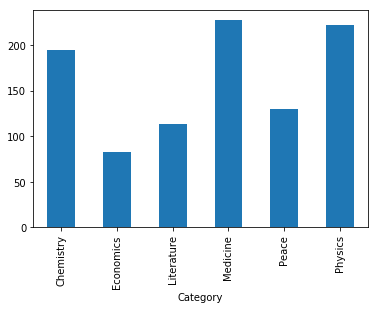

In [49]:
print(cleaned_nps_df.groupby(['Category']).size().sort_values(ascending=False))
cleaned_nps_df.groupby(['Category']).size().plot(kind='bar')
plt.show()

### Question 2: Who are the youngest and the oldest noble prize winners ?
First of all a new column holding the age is added to the data which represents the age of the noble prize winner at the time of winning the prize, it was calculated by subtracting the birth date of the winner from the year of the prize. To get the youngest and the oldest winner the minimum and the maximum values of the age column were obtained

In [72]:
cleaned_nps_df['Birth Date'] = pd.to_datetime(cleaned_nps_df["Birth Date"],errors='coerce')
cleaned_nps_df['Age'] = cleaned_nps_df['Year'] - cleaned_nps_df['Birth Date'].dt.year
Youngest= cleaned_nps_df[cleaned_nps_df['Age'] == min(cleaned_nps_df['Age'])]
Youngest[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
940,2014,Peace,Malala Yousafzai,17.0


In [73]:
oldest = cleaned_nps_df[cleaned_nps_df['Age'] == max(cleaned_nps_df['Age'])]
oldest[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
825,2007,Economics,Leonid Hurwicz,90.0


### Question 2: Who is the first female to win a noble prize ?
In order to identify the first female noble prize winner, we filtered the data according to the column 'Sex' to be female so we can get all the data of the female prize winners, then we chose the first one in the data to get the first ever female winner.


In [67]:
female_noble_winners = cleaned_nps_df[cleaned_nps_df['Sex'] == 'Female']
female_noble_winners.head(1)[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
19,1903,Physics,"Marie Curie, née Sklodowska",36.0
